In [63]:
import sys
sys.path.append('../')
import sqlite3
import json
from backtester import *
from fxcmtoken import major_forex_pairs
from sklearn.model_selection import train_test_split
from datetime import datetime
major_forex_pairs

freq = 'm15'
conn = sqlite3.connect(f'../PriceData/PriceData_{freq}.db')
ticker = major_forex_pairs[0]
print(ticker)
data = pd.read_sql(f"SELECT * FROM '{ticker}'", conn, parse_dates=['date'], index_col=['date'])
conn.close()
columns = ['open', 'high', 'low', 'close']
for col in columns:
    data[col] = data[['bid'+col, 'ask'+col]].mean(axis=1)
display(data)
test_size = 0.048
test_len = int(test_size * len(data))

EUR/USD


,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,open,high,low,close
date,,,,,,,,,,,,,
2021-07-21 01:45:00,1.17756,1.17746,1.17767,1.17735,1.17770,1.17758,1.17779,1.17747,1850,1.177630,1.177730,1.177410,1.177520
2021-07-21 02:00:00,1.17746,1.17730,1.17746,1.17711,1.17758,1.17742,1.17759,1.17723,1377,1.177520,1.177525,1.177170,1.177360
2021-07-21 02:15:00,1.17730,1.17703,1.17735,1.17696,1.17742,1.17716,1.17748,1.17708,1658,1.177360,1.177415,1.177020,1.177095
2021-07-21 02:30:00,1.17703,1.17712,1.17716,1.17695,1.17716,1.17724,1.17728,1.17707,2047,1.177095,1.177220,1.177010,1.177180
2021-07-21 02:45:00,1.17712,1.17719,1.17722,1.17705,1.17724,1.17731,1.17735,1.17718,1078,1.177180,1.177285,1.177115,1.177250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-10 20:45:00,1.13144,1.13166,1.13177,1.13137,1.13158,1.13178,1.13190,1.13151,705,1.131510,1.131835,1.131440,1.131720
2021-12-10 21:00:00,1.13165,1.13148,1.13177,1.13147,1.13178,1.13159,1.13189,1.13159,491,1.131715,1.131830,1.131530,1.131535
2021-12-10 21:15:00,1.13148,1.13167,1.13169,1.13148,1.13160,1.13181,1.13182,1.13159,264,1.131540,1.131755,1.131535,1.131740


In [64]:
window = 30
data['rsi'] = ta.momentum.rsi(data['close'], window=window, fillna=False)
data.dropna(inplace=True)
display(data.tail())
print(data.shape)

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,open,high,low,close,rsi
date,,,,,,,,,,,,,,
2021-12-10 20:45:00,1.13144,1.13166,1.13177,1.13137,1.13158,1.13178,1.13190,1.13151,705,1.131510,1.131835,1.131440,1.131720,57.620373
2021-12-10 21:00:00,1.13165,1.13148,1.13177,1.13147,1.13178,1.13159,1.13189,1.13159,491,1.131715,1.131830,1.131530,1.131535,56.599689
2021-12-10 21:15:00,1.13148,1.13167,1.13169,1.13148,1.13160,1.13181,1.13182,1.13159,264,1.131540,1.131755,1.131535,1.131740,57.463429
2021-12-10 21:30:00,1.13167,1.13166,1.13188,1.13159,1.13180,1.13181,1.13202,1.13175,189,1.131735,1.131950,1.131670,1.131735,57.434589
2021-12-10 21:45:00,1.13166,1.13153,1.13176,1.13134,1.13180,1.13177,1.13198,1.13154,520,1.131730,1.131870,1.131440,1.131650,56.932083


(9971, 14)


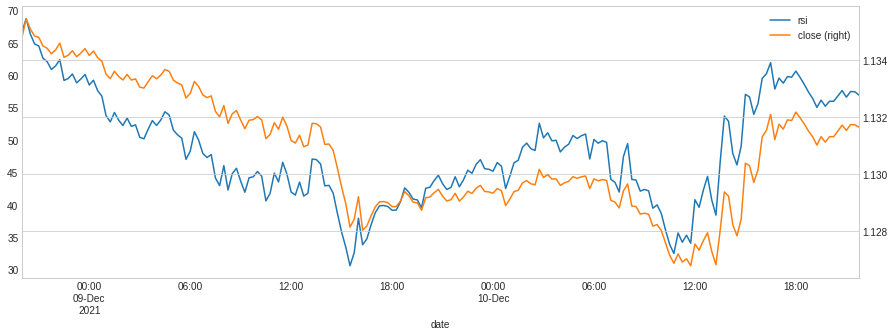

In [65]:
data[['rsi', 'close']].iloc[-200:].plot(figsize=(15,5), secondary_y='close')
# plt.hlines(y=70, xmin=data.index[0], xmax=data.index[-1], colors='k', linestyles='--')
# plt.hlines(y=30, xmin=data.index[0], xmax=data.index[-1], colors='k', linestyles='--')
plt.show()

*** Positions ***
0.0    480
Name: signal, dtype: int64
--------------------------------------------------
*** Trades ***
0.0    479
Name: signal, dtype: int64


  0%|          | 0/479 [00:00<?, ?it/s]

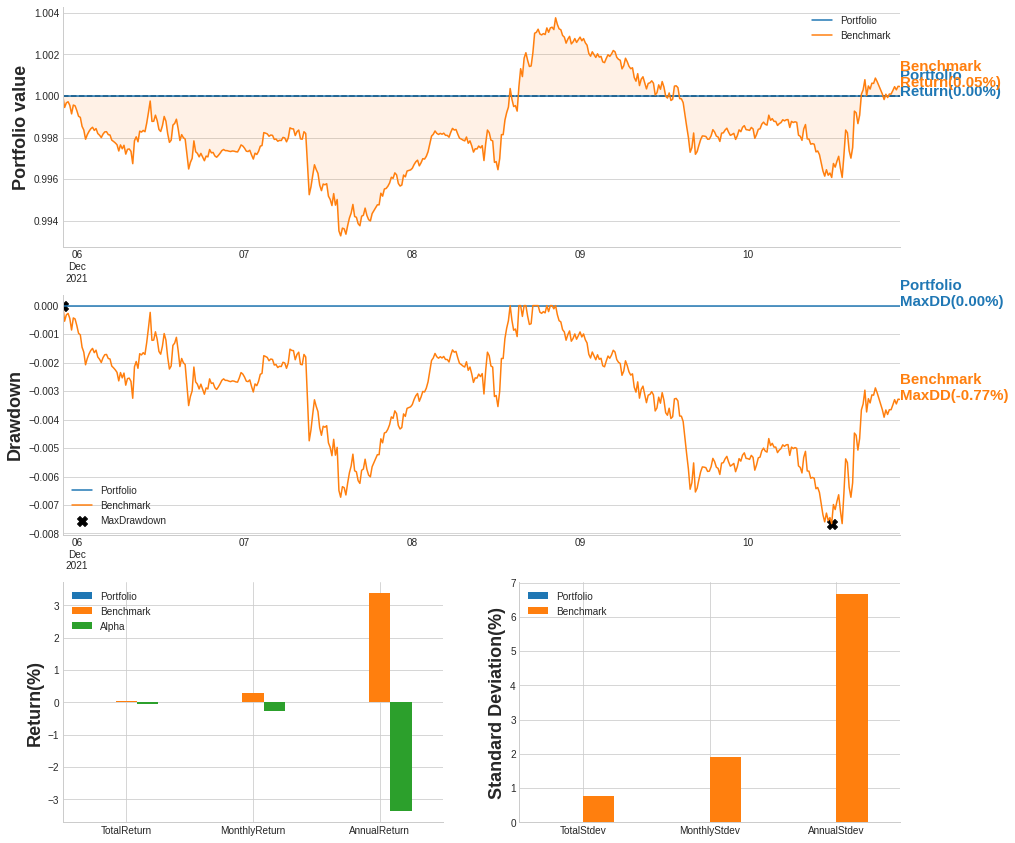

----------------------------------------------------------------------
Data length: |4 days 23:45:00|
Data range from |2021-12-05 22:00:00| to |2021-12-10 21:45:00|
----------------------------------------------------------------------
***** Portfolio Returns in percentage(%) *****
╒═══════════════╤═════════════╤═════════════╤═════════╕
│               │   Portfolio │   Benchmark │   Alpha │
╞═══════════════╪═════════════╪═════════════╪═════════╡
│ TotalReturn   │       0.000 │       0.046 │  -0.046 │
├───────────────┼─────────────┼─────────────┼─────────┤
│ MonthlyReturn │       0.000 │       0.277 │  -0.277 │
├───────────────┼─────────────┼─────────────┼─────────┤
│ AnnualReturn  │       0.000 │       3.369 │  -3.369 │
╘═══════════════╧═════════════╧═════════════╧═════════╛
***** Portfolio Standard Deviation in percentage(%) *****
╒══════════════╤═════════════╤═════════════╕
│              │   Portfolio │   Benchmark │
╞══════════════╪═════════════╪═════════════╡
│ TotalStdev   │    

In [66]:
# strategy
# RSI >= 70 --> short
# RSI <= 30 --> long

if data.shape[0] > test_len:
    data = data.iloc[-test_len:]
else:
    pass

data['signal'] = np.where(data['rsi'] >= 70, -1, np.where(data['rsi'] <= 30, 1, np.nan))
data['signal'] = data['signal'].ffill().fillna(0)
print('*** Positions ***')
print(data['signal'].value_counts())
print('-'*50)
print('*** Trades ***')
print(data['signal'].diff(1).apply(np.abs).value_counts())

backtest = IterativeBacktester(data=data,
                               signals=data['signal'],
                               freq=freq)
backtest.backtest()
backtest.results()